In [7]:
"""
dft_1d.ipynb
En este archivo realizamos algunas visualizaciones básicas de las DFTs de un array unidimensional,
mostrando sus partes reales e imaginarias
"""

import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import matplotlib as mpl
import os
plt.style.use(["science", "grid"])
FONT_SIZE = 18
plt.rcParams.update({
    'font.size': FONT_SIZE,          # Set font size for labels, titles, and ticks
    'axes.labelsize': FONT_SIZE,      # Axis label font size
    'xtick.labelsize': FONT_SIZE,     # X-axis tick label font size
    'ytick.labelsize': FONT_SIZE      # Y-axis tick label font size
})

In [8]:

def plot_fft_1d(seq, save_path=None):
    # Computar FFT
    F = np.fft.fft(seq)
    indices = np.arange(len(seq))
    
    # Partes real e imaginaria
    real_part = np.real(F)
    imag_part = np.imag(F)

    # Subset de ticks
    xticks = []
    if len(seq) > 10:
        xticks = np.arange(0, len(seq)+1, 10)
    else:
        xticks = indices

    # Señal original
    plt.figure(figsize=(5, 4))
    plt.stem(indices, seq, linefmt="g-", markerfmt="go", basefmt="k")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.xlabel("Índice")
    plt.ylabel("Amplitud")
    plt.xticks(xticks)  # Set x-ticks to a subset of whole numbers
    if save_path:
        plt.savefig(f"{save_path}/original_signal.pdf", dpi=300)
    else:
        plt.show()

    # Parte real
    plt.figure(figsize=(5, 4))
    plt.stem(indices, real_part, linefmt="b-", markerfmt="bo", basefmt="k")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.xlabel("Índice")
    plt.ylabel("Amplitud")
    plt.xticks(xticks)
    if save_path:
        plt.savefig(f"{save_path}/real_part_fft.pdf", dpi=300)
    else:
        plt.show()

    # Parte imaginaria
    plt.figure(figsize=(5, 4))
    plt.stem(indices, imag_part, linefmt="r-", markerfmt="ro", basefmt="k")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.xlabel("Índice")
    plt.ylabel("Amplitud")
    plt.xticks(xticks)  # Set x-ticks to a subset of whole numbers
    if save_path:
        plt.savefig(f"{save_path}/imaginary_part_fft.pdf", dpi=300)
    else:
        plt.show()


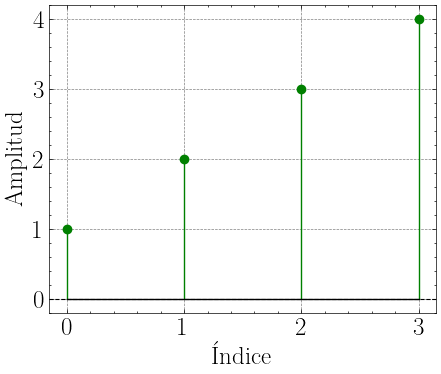

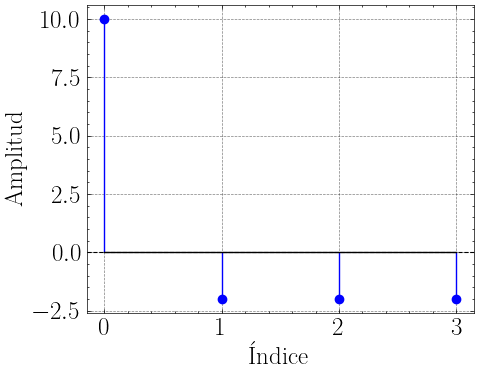

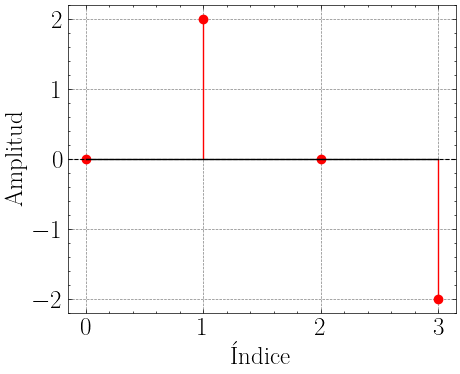

In [9]:
# Real
plot_fft_1d([1,2,3,4])

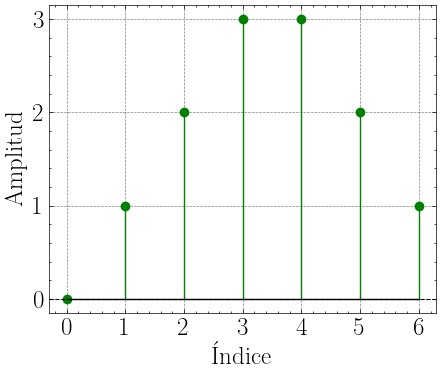

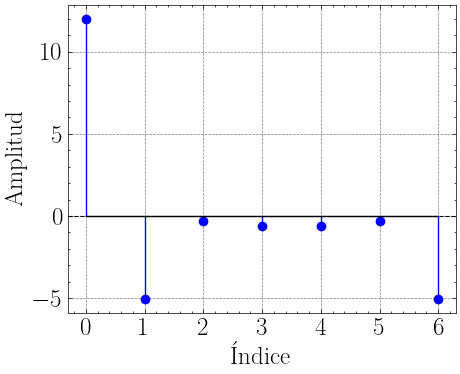

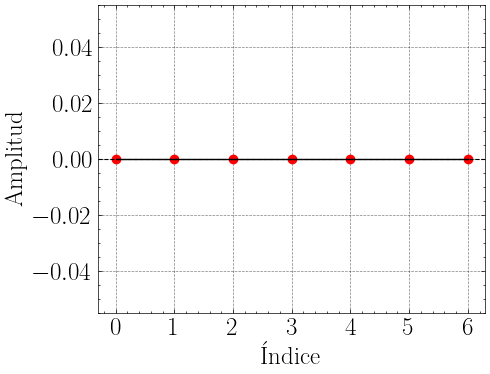

In [10]:
# Real, par
plot_fft_1d([0, 1, 2, 3, 3, 2, 1])

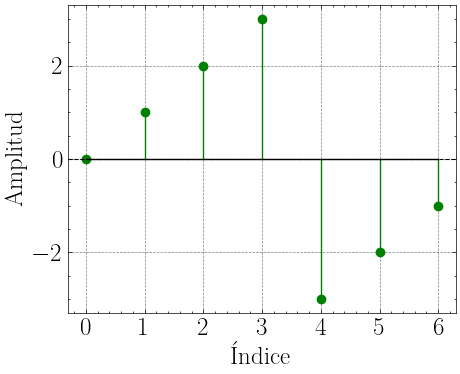

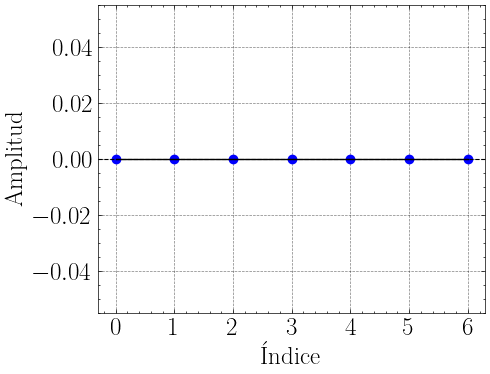

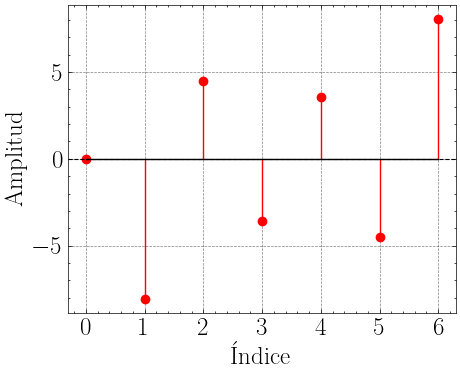

In [11]:
# Real, impar
plot_fft_1d([0, 1, 2, 3, -3, -2, -1])

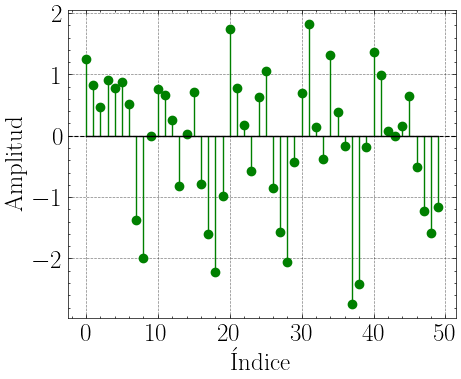

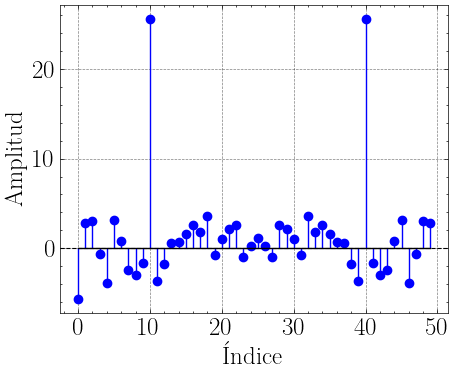

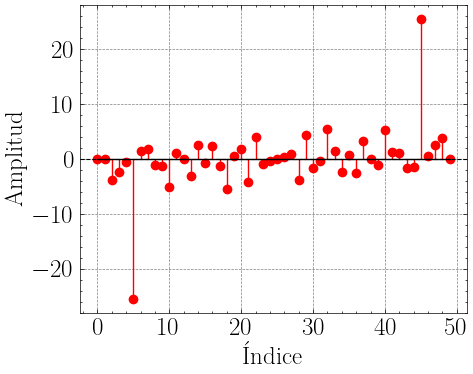

In [12]:
t = np.linspace(0, 1, 50, endpoint=False)

# Señal consistente en una suma de seno (5hz) y coseno (10hz)
signal = (
    np.sin(2 * np.pi * 5 * t) +
    np.cos(2 * np.pi * 10 * t)
)

# Añadir ruido gaussiano
np.random.seed(42)
noise = 0.5 * np.random.normal(size=t.shape)
noisy_signal = signal + noise
plot_fft_1d(noisy_signal, save_path=os.path.join("plots"))